# Explore here

In [3279]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns
from pickle import dump


In [3280]:
### DATA ANALYSIS FOR GOOGLE PLAY STORE REVIEWS
### To classify a comment as negative or positive depending on its content
# Get dataset
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/naive-bayes-project-tutorial/main/playstore_reviews.csv")

# Print the first rows of the dataframe for visualization
df.head()

,package_name,review,polarity
0,com.facebook.katana,privacy at least put some option appear offli...,0
1,com.facebook.katana,"messenger issues ever since the last update, ...",0
2,com.facebook.katana,profile any time my wife or anybody has more ...,0
3,com.facebook.katana,the new features suck for those of us who don...,0
4,com.facebook.katana,forced reload on uploading pic on replying co...,0


In [3281]:
df.shape

(891, 3)

In [3282]:
df.head().T

,0,1,2,3,4
package_name,com.facebook.katana,com.facebook.katana,com.facebook.katana,com.facebook.katana,com.facebook.katana
review,privacy at least put some option appear offli...,"messenger issues ever since the last update, ...",profile any time my wife or anybody has more ...,the new features suck for those of us who don...,forced reload on uploading pic on replying co...
polarity,0,0,0,0,0


In [3283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   package_name  891 non-null    object
 1   review        891 non-null    object
 2   polarity      891 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 21.0+ KB


The column "package_name" is dropped because it is irrelevant information for this data analysis as the clasiffication will be done based only on the content of the review (not on the name of the Google Store application).

In [3284]:
# Eliminate the column 'package_name'
df.drop(['package_name'],axis=1, inplace=True)
df.head().T

,0,1,2,3,4
review,privacy at least put some option appear offli...,"messenger issues ever since the last update, ...",profile any time my wife or anybody has more ...,the new features suck for those of us who don...,forced reload on uploading pic on replying co...
polarity,0,0,0,0,0


In [3285]:
# Start Exploratory data analysis (EDA)
# Count the number of unique values in the dataframe
print("Number of unique values:\n")
df.nunique()

Number of unique values:



review      891
polarity      2
dtype: int64

In [3286]:
# Check if duplicates
print(f"Duplicate values: {df.duplicated().sum():.2f}")

Duplicate values: 0.00


There are no duplicated values in the dataframe.

In [3287]:
# Check the lines with at least one isnull value (%)
df.isnull().sum()

review      0
polarity    0
dtype: int64

There are no isnull values in the dataframe.

<Axes: >

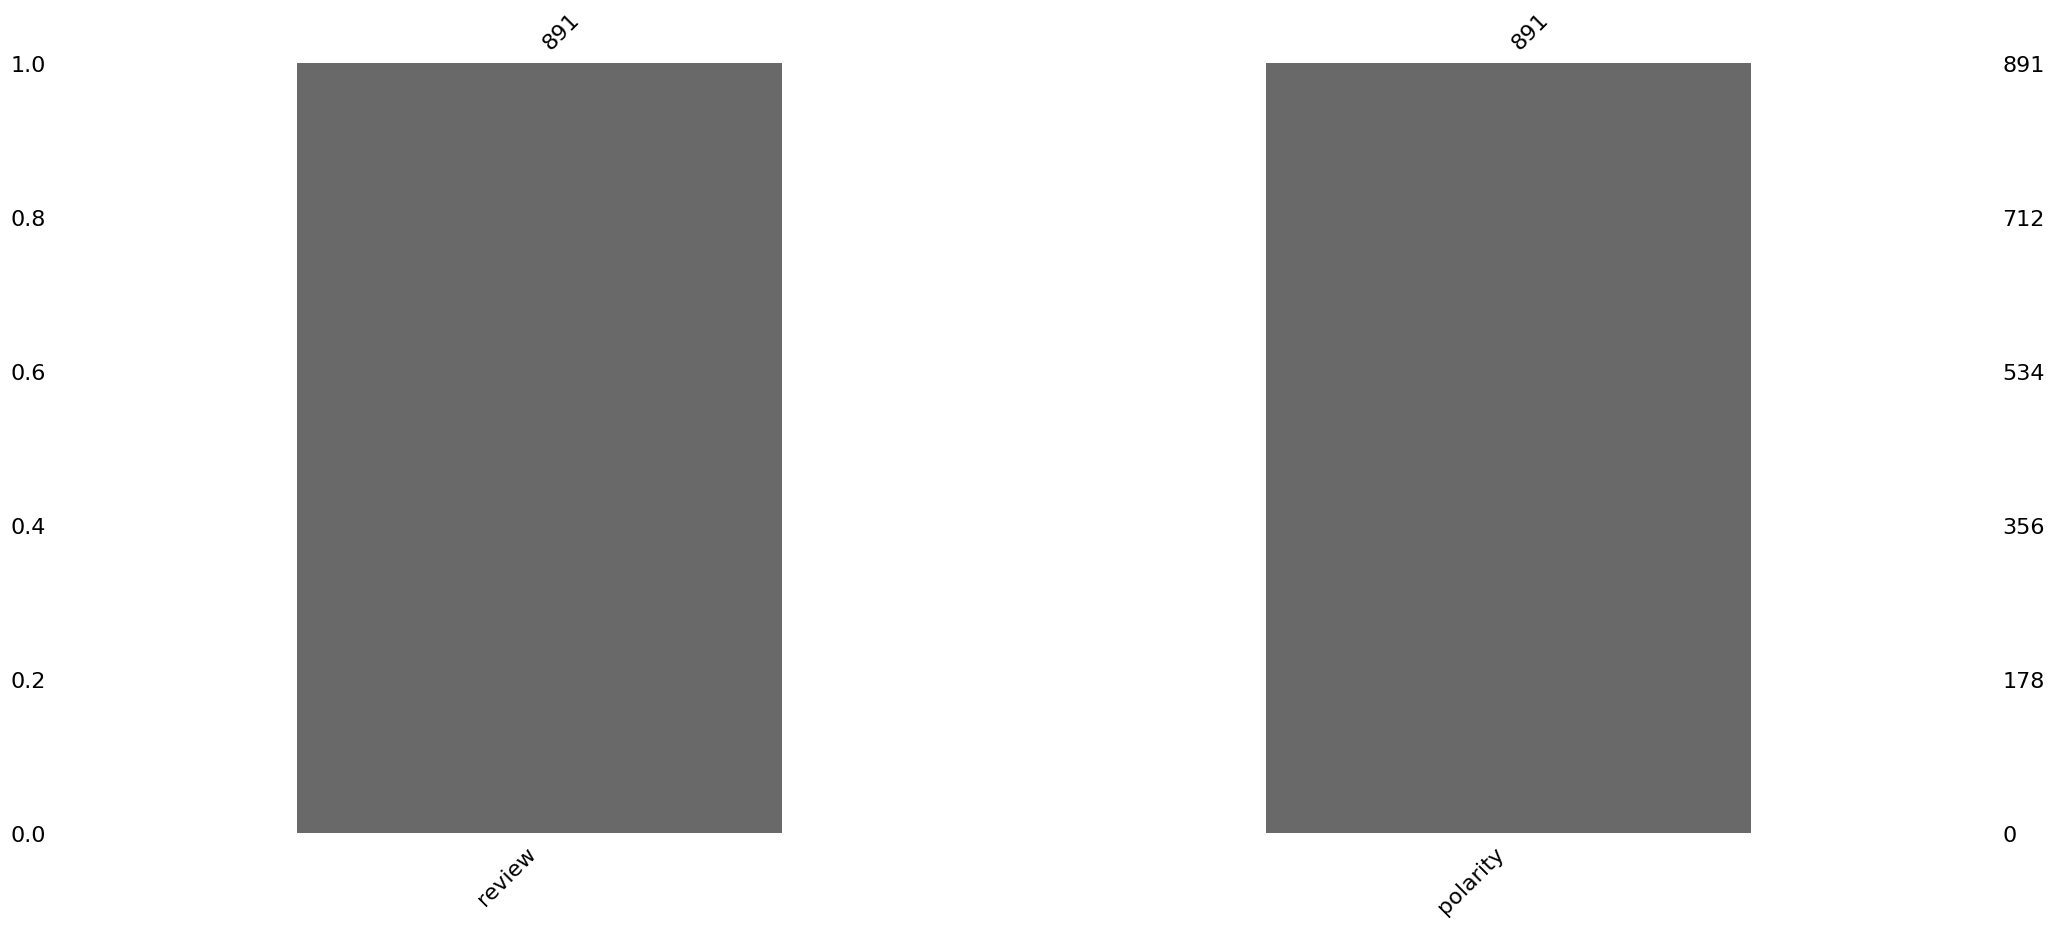

In [3288]:
# Visualize missing values in dataframe 
msno.bar(df)

There are no missing values in the dataframe.

In [3289]:
# Remove spaces and convert the text of "review" column to lowercase
df["review"] = df["review"].str.strip().str.lower()
df.head()

,review,polarity
0,privacy at least put some option appear offlin...,0
1,"messenger issues ever since the last update, i...",0
2,profile any time my wife or anybody has more t...,0
3,the new features suck for those of us who don'...,0
4,forced reload on uploading pic on replying com...,0


In [3290]:
# Column "review" unique values
print(f"Column review unique values: {df['review'].unique()}")

Column review unique values: ["privacy at least put some option appear offline. i mean for some people like me it's a big pressure to be seen online like you need to response on every message or else you be called seenzone only. if only i wanna do on facebook is to read on my newsfeed and just wanna response on message i want to. pls reconsidered my review. i tried to turn off chat but still can see me as online."
 "messenger issues ever since the last update, initial received messages don't get pushed to the messenger app and you don't get notification in the facebook app or messenger app. you open the facebook app and happen to see you have a message. you have to click the icon and it opens messenger. subsequent messages go through messenger app, unless you close the chat head... then you start over with no notification and having to go through the facebook app."
 "profile any time my wife or anybody has more than one post and i view them it would take me to there profile so that i c

In [3291]:
# Column "polarity" unique values
print(f"Column polarity unique values: {df['polarity'].unique()}")

Column polarity unique values: [0 1]


In [3292]:
# Train/test split
X = df['review']
y = df['polarity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train


331    just did the latest update on viber and yet ag...
733    keeps crashing it only works well in extreme d...
382    the fail boat has arrived the 6.0 version is t...
704    superfast, just as i remember it ! opera mini ...
813    installed and immediately deleted this crap i ...
                             ...                        
106    why can't i share my achievements? recently di...
270    beta is the best version of the chrome browser...
860    great little game. this is a great little game...
435    keeps crashing ever since i started using it m...
102    even though i am loving the new update, but th...
Name: review, Length: 712, dtype: object

In [3293]:
y_train

331    0
733    0
382    0
704    1
813    1
      ..
106    0
270    0
860    1
435    0
102    0
Name: polarity, Length: 712, dtype: int64

In [3294]:
# Convert the text into a matrix comprising numbers
vectorizer = CountVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)

In [3295]:
vectorizer.vocabulary_

{'just': 1550,
 'did': 822,
 'latest': 1611,
 'update': 3070,
 'viber': 3129,
 'problems': 2208,
 'send': 2539,
 'messages': 1801,
 'try': 2995,
 'make': 1741,
 'saying': 2491,
 'ringing': 2431,
 'sound': 2685,
 'don': 874,
 'think': 2915,
 'actually': 105,
 'answers': 187,
 'calls': 454,
 'time': 2937,
 'updates': 3074,
 'doesn': 869,
 'work': 3235,
 'fix': 1113,
 'asap': 236,
 'england': 971,
 'thank': 2901,
 'keeps': 1556,
 'crashing': 706,
 'works': 3238,
 'extreme': 1045,
 'data': 750,
 'savings': 2488,
 'mode': 1839,
 'high': 1361,
 'websites': 3187,
 'dont': 877,
 'load': 1676,
 'moving': 1857,
 'browser': 411,
 'fail': 1058,
 'boat': 368,
 'arrived': 231,
 'version': 3125,
 'touted': 2968,
 'advanced': 129,
 'fact': 1056,
 'contains': 664,
 'big': 339,
 'old': 1977,
 'disappointment': 847,
 'widget': 3209,
 'wasn': 3172,
 'available': 269,
 'google': 1245,
 'urged': 3089,
 'switch': 2831,
 'sms': 2652,
 'function': 1187,
 'hangouts': 1309,
 'longer': 1693,
 'wth': 3256,
 'want'

In [3296]:
vectorizer.get_feature_names_out()


array(['000', '04', '0x', ..., 'žŕ', 'žŕľ', 'ˇŕ'],
      shape=(3310,), dtype=object)

In [3297]:
X_train_vec

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 12575 stored elements and shape (712, 3310)>

In [3298]:
X_train_vec.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(712, 3310))

In [3299]:
X_test_vec = vectorizer.transform(X_test)
X_test_vec.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(179, 3310))

FIRST STEP:

TRAINING WITH THE THREE NAIVE BAYES MODELS.

For this data analysis, the chosen model is Multinomial Naive Bayes because it is a Classification with features representing discrete frequencies as the reviews include multiple words with discrete frequencies. 

In [3300]:
# Create and train a Multinomial Naive Bayes model
model = MultinomialNB()
model.fit(X_train_vec, y_train)

MultinomialNB()

In [3301]:
# Predict with the Multinomial Naive Bayes model
y_pred = model.predict(X_test_vec)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0])

In [3302]:
# Accuracy for the Multinomial Naive Bayes model
print(f"Accuracy for Multinomial Naive Bayes model: {accuracy_score(y_test, y_pred):.3f}")

Accuracy for Multinomial Naive Bayes model: 0.816


To compare the three Naive Bayes models, it is done also the training with the other two Naive Bayes implementations: Bernoulli and Gaussian.

In [3303]:
# Train and predict with a Bernoulli Naive Bayes model
model2 = BernoulliNB()
model2.fit(X_train_vec, y_train)
y_pred2 = model2.predict(X_test_vec)
# Accuracy for the Bernoulli Naive Bayes model
print(f"Accuracy for Bernoulli Naive Bayes model: {accuracy_score(y_test, y_pred2):.2f}")

Accuracy for Bernoulli Naive Bayes model: 0.77


In [3304]:
# Train and predict with a Gaussian Naive Bayes model
model3 = GaussianNB()
model3.fit(X_train_vec.toarray(), y_train)
y_pred3 = model3.predict(X_test_vec.toarray())
# Accuracy for the Gaussian Naive Bayes model
print(f"Accuracy for Gaussian Naive Bayes model: {accuracy_score(y_test, y_pred3):.2f}")


Accuracy for Gaussian Naive Bayes model: 0.80


After training the model in the three implementations of Naive Bayes, the best option is the Multinomial Naive Bayes model with an accuracy of 0.81 compared with 0.77 for Bernoulli and 0.80 for Gaussian Naive Bayes model.

SECOND STEP:

OPTIMIZATION OF THE DATA ANALYSIS WITH RANDOM FOREST MODEL.

In [3305]:
# Optimization with a Random Forest model
# Create a Random Forest model
rf = RandomForestClassifier(n_estimators = 50, max_depth=None, random_state = 42)
# Train the model with the train data
rf.fit(X_train_vec, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [3306]:
# Make predictions with the test data
y_pred4 = rf.predict(X_test_vec)
y_pred4

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0])

In [3307]:
# Accuracy for the Random Forest model
print(f"Accuracy for Random Forest model: {accuracy_score(y_test, y_pred4):.3f}")

Accuracy for Random Forest model: 0.821


The Random Forest model was testing with different hyperparameters:
- n_estimators: 5, 10, 20, 50, 60.
- max_depth: None, 2, 4.

The best model is the Random Forest with the highest accuracy of 0.82, compared with 0.81 for Multinomial, 0.77 for Bernoulli and 0.80 for Gaussian Naive Bayes models. 

THIRD STEP:

OPTIMIZATION OF THE DATA ANALYSIS WITH BOOSTING ALGORITHM MODEL.

In [3308]:
# Create the Boosting Algorithm
gbc = GradientBoostingClassifier(n_estimators = 2600, max_depth=5, learning_rate=0.1, max_features=2, random_state = 42)
# Train the model with the train data
gbc.fit(X_train_vec, y_train)
# Make predictions with the test data
y_pred5 = gbc.predict(X_test_vec)
y_pred5

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0])

In [3309]:
print(f"Accuracy for Gradient Boosting Classifier model: {accuracy_score(y_test, y_pred5)}")

Accuracy for Gradient Boosting Classifier model: 0.8603351955307262


The Gradient Boosting was testing with different hyperparameters:
- n_estimators: 50, 100, 500, 1000, 2000, 2500, 2600, 2700.
- max_depth: 3, 4, 5.
- learning_rate: 0.01, , 0.10, 0.2.
- max_features: None, 1, 2, 3.

The best model is the Gradient Boosting with the highest accuracy of 0.86, compared with 0.82 for Random Forest, 0.81 for Multinomial, 0.77 for Bernoulli and  0.80 for Gaussian Naive Bayes models. 

In [3310]:
# Compute the confusion matrix for Gradient Boosting model
cm = confusion_matrix(y_test, y_pred5)

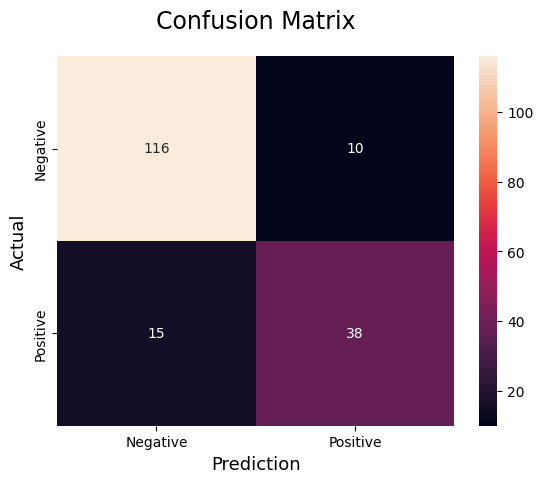

In [3311]:
# Plot the confusion matrix for Gradient Boosting model
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['Negative','Positive'],
            yticklabels=['Negative','Positive'])
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.xlabel('Prediction', fontsize=13)
plt.ylabel('Actual', fontsize=13)
plt.show()

In [3312]:
# Classification Report for Gradient Boosting model
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       126
           1       0.79      0.72      0.75        53

    accuracy                           0.86       179
   macro avg       0.84      0.82      0.83       179
weighted avg       0.86      0.86      0.86       179



CONCLUSIONS OF THE DATA ANALYSIS

The Gradient Boosting model has the best accuracy with a value of 0.86.

According to the Recall metric, the Gradient Boosting model is better recognizing the negative reviews (92%) than the positive reviews (72%).

Also the F1 score is very high for the negatives reviews with a 92% that is a very good performance and a 75% for the positive reviews that is a good value.

The chosen model for this data analysis is the Gradient Boosting model.

In [3313]:
# Save the Gradient Boosting model
dump(rf, open("../models/gbc_nestimators-2600_mdepth-5_maxf_2_42.sav", "wb"))